In [1]:
import cirq
import qsimcirq
import numpy as np
import matplotlib.pyplot as plt
from qsim_utils import *
from stabilizer_sim import *

# Steane-c1-L1

## Encoding

In [3]:
num_qubits = [7,3,3]
noise_model,readout_noise = None,None

gate_seq_X1245 = [[7],(7,10),(7,0),(10,1),(7,3),(10,4),(7,10),[7],['m',7],['m',10]]
gate_seq_X1347 = [[8],(8,11),(8,0),(8,3), (8,6),(11,2),(8,11),[8],['m',8],['m',11]]
gate_seq_X4567 = [[9],(9,12),(9,3),(12,4),(9,6),(12,5),(9,12),[9],['m',9],['m',12]]
stab_X1,qubits = create_cirq(num_qubits,gate_seq_X1245,noise_model,readout_noise,['synd_X1','flag_X1'])
stab_X2,qubits = create_cirq(num_qubits,gate_seq_X1347,noise_model,readout_noise,['synd_X2','flag_X2'])
stab_X3,qubits = create_cirq(num_qubits,gate_seq_X4567,noise_model,readout_noise,['synd_X3','flag_X3'])

gate_seq_Z1245 = [[10],(10,7),(0,7),(1,10),(3,7),(4,10),(10,7),[10],['m',7],['m',10]]
gate_seq_Z1347 = [[11],(11,8),(0,8),(3,8), (6,8),(2,11),(11,8),[11],['m',8],['m',11]]
gate_seq_Z4567 = [[12],(12,9),(3,9),(4,12),(6,9),(5,12),(12,9),[12],['m',9],['m',12]]
stab_Z1,qubits = create_cirq(num_qubits,gate_seq_Z1245,noise_model,readout_noise,['synd_Z1','flag_Z1'])
stab_Z2,qubits = create_cirq(num_qubits,gate_seq_Z1347,noise_model,readout_noise,['synd_Z2','flag_Z2'])
stab_Z3,qubits = create_cirq(num_qubits,gate_seq_Z4567,noise_model,readout_noise,['synd_Z3','flag_Z3'])

stabs = [stab_X1,stab_X2,stab_X3,stab_Z1,stab_Z2,stab_Z3]
print(stab_X1)
print(stab_X3)

                      ┌──┐   ┌──┐
data0: ────────────────X──────────────────────────────────────────────
                       │
data1: ────────────────┼X─────────────────────────────────────────────
                       ││
data3: ────────────────┼┼─────X───────────────────────────────────────
                       ││     │
data4: ────────────────┼┼─────┼X──────────────────────────────────────
                       ││     ││
flag0: ───────────X────┼@─────┼@────X───M('flag_X1')──────────────────
                  │    │      │     │
syndrome0: ───H───@────@──────@─────@───H──────────────M('synd_X1')───
                      └──┘   └──┘
                      ┌──┐   ┌──┐
data3: ────────────────X──────────────────────────────────────────────
                       │
data4: ────────────────┼X─────────────────────────────────────────────
                       ││
data5: ────────────────┼┼──────X──────────────────────────────────────
                       ││      │
data6: ──────────────

In [4]:
# trapped ion encoding circuit
# gate_seq_encode = [[1],[2],[5],[1,0],[2,6],[5,4],[2,3],[5,6],[1,4],[2,0],[4,3],['m',7,8,9,10,11,12]] #, [0,7],[4,7],[6,7],['m',7]]
gate_seq_encode = [[1],[2],[5],[1,0],[2,6],[5,4],[2,3],[5,6],[1,4],[2,0],[4,3],[0,7],[4,7],[6,7],['m',7]]
encode,qubits = create_cirq(num_qubits,gate_seq_encode,noise_model,readout_noise,['encode'])
print(encode)

                  ┌──┐   ┌──┐
data0: ────────────X────────────X───@─────────────────────────
                   │            │   │
data1: ───────H────@───────@────┼───┼─────────────────────────
                           │    │   │
data2: ───────H────@──────@┼────@───┼─────────────────────────
                   │      ││        │
data3: ────────────┼──────X┼────X───┼─────────────────────────
                   │       │    │   │
data4: ────────────┼X──────X────@───┼───@─────────────────────
                   ││               │   │
data5: ───────H────┼@─────@─────────┼───┼─────────────────────
                   │      │         │   │
data6: ────────────X──────X─────────┼───┼───@─────────────────
                                    │   │   │
syndrome0: ─────────────────────────X───X───X───M('encode')───
                  └──┘   └──┘


In [22]:
qsim_simulator = qsimcirq.QSimSimulator()
num_rep = 1e4

In [29]:
results = qsim_simulator.simulate(encode)
print('Logical 0 state:\t',results.dirac_notation())
logical0 = results.state_vector()

Logical 0 state:	 0.35|00000000⟩ + 0.35|00011110⟩ + 0.35|01101010⟩ + 0.35|01110100⟩ + 0.35|10101100⟩ + 0.35|10110010⟩ + 0.35|11000110⟩ + 0.35|11011000⟩


In [49]:
circuit = cirq.Circuit() #encode.copy()
for stab in stabs[:3]:
    circuit += stab
results = qsim_simulator.simulate(circuit)
print('Logical 0 state:\t',results.dirac_notation())
# abs(results.state_vector()-logical0).max()

Logical 0 state:	 0.35|0000000000000⟩ + 0.35|0001111000000⟩ + 0.35|0110101000000⟩ + 0.35|0111010000000⟩ + 0.35|1010110000000⟩ + 0.35|1011001000000⟩ + 0.35|1100011000000⟩ + 0.35|1101100000000⟩


## QSP fidelity

In [22]:
import cirq
import qsimcirq
import numpy as np
import matplotlib.pyplot as plt
from qsim_utils import *
from stabilizer_sim import *

def signed_probs(mmts_full,locs):
    '''
    For calculating expectation values of strings of the same pauli
    Eg: <ZZ> = P00 - P01 - P10 + P11
    '''
    outcomes = np.array(list(itertools.product([0,1],repeat=len(locs))))
    mmts = mmts_full[:,locs]
    signs = (-1)**(outcomes.sum(1)%2) #minus for odd number of 1s
    probs = []
    for outcome in outcomes:
        probs.append((mmts==outcome).prod(1).sum()/mmts.shape[0])
    res = (signs*probs).sum()
    # return 1 if np.isnan(res) else res
    # return 0 if np.isnan(res) else res
    return res

def QND_fidelity_measures(num_qubits,in_circuit,circuit,noise_model,readout_noise,num_rep=1024,seed=0,print_circ=False):
    # Direct measurement in X basis
    hadamards = [[i] for i in range(num_qubits[0])]
    mmts = ['m']+list(range(num_qubits[0]))
    in_circuit_measureX = create_cirq(num_qubits,[*hadamards,mmts],noise_model,readout_noise,['in_X_on_data'])[0]
    circuit_measureX = create_cirq(num_qubits,[*hadamards,mmts],noise_model,readout_noise,['X_on_data'])[0]
    full_circuit = in_circuit + in_circuit_measureX +\
                    in_circuit + circuit + circuit_measureX
    if print_circ: print(full_circuit)
    qsim_simulator = qsimcirq.QSimSimulator(seed=seed)
    results = qsim_simulator.run(full_circuit, repetitions=num_rep)

    flags = np.hstack([results.measurements['flag_X1'],
                   results.measurements['flag_X2'],
                   results.measurements['flag_X3']])
    if flags.shape[1] > 1:
        flags = flags.sum(1).astype(bool).astype(int) # combine the triggered flags
    unflagged_loc = (flags.flatten()==0)

    synds = np.hstack([results.measurements['synd_X1'],
                       results.measurements['synd_X2'],
                       results.measurements['synd_X3']])
    eigstate_locs = []
    outcomes = np.array(list(itertools.product(range(2),repeat=3)))
    for outcome in outcomes:
        eigstate_locs.append((synds == np.array(outcome)).all(1))

    measureX_in = results.measurements['in_X_on_data']
    measureX_out = results.measurements['X_on_data'][unflagged_loc]
    measureX_out_eigstate = []
    pancilla_unflagged = []
    for loc in eigstate_locs:
        measureX_out_eigstate.append(results.measurements['X_on_data'][unflagged_loc*loc])
        pancilla_unflagged.append((unflagged_loc*loc).sum() / unflagged_loc.sum())
    pancilla_unflagged = np.array(pancilla_unflagged)

    flagged = (1-unflagged_loc.sum()/len(unflagged_loc))
    print(f'\nFlagged percentage:\t {flagged*100:.2f} %')

    # QSP fidelity
    # Hard-coding signs and which qubits to evaluate ev
    stab_signs = (-1)**outcomes
    signs = np.zeros([8,7])
    for i in range(8):
        signs[i,:3] = stab_signs[i]
        signs[i,3] = stab_signs[i,0]*stab_signs[i,1]
        signs[i,4] = stab_signs[i,0]*stab_signs[i,2]
        signs[i,5] = stab_signs[i,1]*stab_signs[i,2]
        signs[i,6] = stab_signs[i,0]*stab_signs[i,1]*stab_signs[i,2]

    locs = [[0,1,3,4],[0,2,3,6],[3,4,5,6],[1,2,4,6],[0,1,5,6],[0,2,4,5],[1,2,3,5]]
    pouts = []
    for i in range(8):
        pout = 1
        for j,loc in enumerate(locs):
            pout += signs[i,j]*signed_probs(measureX_out_eigstate[i],loc).sum()
        pouts.append(0.125*pout)
    pouts = np.array(pouts)

    f_qsp = (pancilla_unflagged*pouts).sum()
    print(f'QSP fidelity:\t\t {f_qsp}')


    # print(pancilla_p0,pancilla_m0,pout_p,pout_m)

    return flagged,f_qsp

In [2]:
num_qubits = [7,3,3]
num_rep = int(1e4)
init_state = np.array([0,0,0,0,0,0,0]) #np.random.randint(2,size=7)
print(f'Initial state: {"".join(init_state.astype(str))}')

print('---Ideal encoding circuit to be characterized---')
gate_seq_X1245 = [[7],(7,10),(7,0),(10,1),(7,3),(10,4),(7,10),[7],['m',7],['m',10]]
gate_seq_X1347 = [[8],(8,11),(8,0),(8,3), (8,6),(11,2),(8,11),[8],['m',8],['m',11]]
gate_seq_X4567 = [[9],(9,12),(9,3),(12,4),(9,6),(12,5),(9,12),[9],['m',9],['m',12]]
gate_seqs = [gate_seq_X1245,gate_seq_X1347,gate_seq_X4567]

circuit = cirq.Circuit()
for i,gate_seq in enumerate(gate_seqs):
    c,qubits = create_cirq(num_qubits,gate_seq,None,None,[f'synd_X{i+1}',f'flag_X{i+1}'])
    circuit += c
print(circuit)
    
in_circuit = cirq.Circuit(
    cirq.reset_each(*qubits),
    cirq.X.on_each(np.array(qubits[:num_qubits[0]])[init_state==1])
)

QND_fidelity_measures(num_qubits,in_circuit,circuit,None,None,num_rep,None,False)

Initial state: 0000000
---Ideal encoding circuit to be characterized---
                      ┌──┐   ┌──┐                                             ┌──┐                                                     ┌──┐   ┌──┐
data0: ────────────────X───────────────────────────────────────────────────────X───────────────────────────────────────────────────────────────────────────────────────────────────────
                       │                                                       │
data1: ────────────────┼X──────────────────────────────────────────────────────┼───────────────────────────────────────────────────────────────────────────────────────────────────────
                       ││                                                      │
data2: ────────────────┼┼──────────────────────────────────────────────────────┼X──────────────────────────────────────────────────────────────────────────────────────────────────────
                       ││                                          

(0.0, 1.0)

### Single noise level

In [7]:
p_depol,p_readout = 1e-2,1e-2

noise_model = cirq.NoiseModel.from_noise_model_like(cirq.depolarize(p=p_depol))
readout_noise = cirq.BitFlipChannel(p=p_readout)
circuit = cirq.Circuit()
for i,gate_seq in enumerate(gate_seqs):
    circuit += create_cirq(num_qubits,gate_seq,noise_model,readout_noise,[f'synd_X{i+1}',f'flag_X{i+1}'])[0]

QND_fidelity_measures(num_qubits,in_circuit,circuit,noise_model,readout_noise,num_rep,None,False)


Flagged percentage:	 14.79 %
QSP fidelity:		 0.7156437037906349


(0.14790000000000003, 0.7156437037906349)

In [8]:
QND_fidelity_measures(num_qubits,in_circuit,circuit,noise_model,readout_noise,num_rep,None,False)


Flagged percentage:	 14.83 %
QSP fidelity:		 0.718562874251497


(0.1483, 0.718562874251497)

In [19]:
# %%prun -s time -q -l 30 -T prun0
QND_fidelity_measures(num_qubits,in_circuit,circuit,noise_model,readout_noise,num_rep,None,False)


Flagged percentage:	 15.14 %
QSP fidelity:		 0.7149422578364365


(0.15139999999999998, 0.7149422578364365)

In [15]:
print(open('prun0', 'r').read())

         179762 function calls (158435 primitive calls) in 7.125 seconds

   Ordered by: internal time
   List reduced from 371 to 30 due to restriction <30>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    10000    6.849    0.001    6.849    0.001 {built-in method qsimcirq.qsim_sse.qtrajectory_sample}
        1    0.107    0.107    7.076    7.076 qsim_simulator.py:282(_sample_measure_results)
    10000    0.036    0.000    0.036    0.000 {method 'randint' of 'numpy.random.mtrand.RandomState' objects}
     3239    0.017    0.000    0.017    0.000 {method 'reduce' of 'numpy.ufunc' objects}
18158/11219    0.009    0.000    0.010    0.000 {built-in method builtins.getattr}
      656    0.006    0.000    0.006    0.000 moment.py:97(operations)
       56    0.006    0.000    0.014    0.000 2152469903.py:8(signed_probs)
4395/1899    0.004    0.000    0.034    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
        1    0.004    0.004 

In [10]:
print(open('prun0', 'r').read())

         179762 function calls (158435 primitive calls) in 7.242 seconds

   Ordered by: cumulative time
   List reduced from 371 to 30 due to restriction <30>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    7.242    7.242 {built-in method builtins.exec}
        1    0.000    0.000    7.242    7.242 <string>:1(<module>)
        1    0.003    0.003    7.241    7.241 2152469903.py:22(QND_fidelity_measures)
        1    0.000    0.000    7.205    7.205 sampler.py:36(run)
        1    0.000    0.000    7.205    7.205 simulator.py:70(run_sweep)
        2    0.000    0.000    7.205    3.602 simulator.py:80(run_sweep_iter)
        1    0.000    0.000    7.202    7.202 qsim_simulator.py:260(_run)
        1    0.117    0.117    7.202    7.202 qsim_simulator.py:282(_sample_measure_results)
    10000    6.972    0.001    6.972    0.001 {built-in method qsimcirq.qsim_sse.qtrajectory_sample}
        1    0.000    0.000    0.062    0.062 qsim_s

### Input state: 0000000, 1111111

In [ ]:
init_state = np.array([0,0,0,0,0,0,0]) #np.random.randint(2,size=7)
print(f'Initial state: {"".join(init_state.astype(str))}')

in_circuit = cirq.Circuit(
    cirq.reset_each(*qubits),
    cirq.X.on_each(np.array(qubits[:num_qubits[0]])[init_state==1])
)

ps_readout= np.logspace(-5,-1,5) 
ps_depol= np.logspace(-5,-1,9)

fidelities = []
for p_readout in ps_readout:
    fidelities.append([])
    for p_depol in ps_depol:
        noise_model = cirq.NoiseModel.from_noise_model_like(cirq.depolarize(p=p_depol))
        readout_noise = cirq.BitFlipChannel(p=p_readout)
        circuit = cirq.Circuit()
        for i,gate_seq in enumerate(gate_seqs):
            circuit += create_cirq(num_qubits,gate_seq,noise_model,readout_noise,[f'synd_X{i+1}',f'flag_X{i+1}'])[0]
        fidelities[-1].append(QND_fidelity_measures(num_qubits,in_circuit,circuit,noise_model,readout_noise,num_rep,None,False))
fidelities = np.array(fidelities)
np.save('data/fullcircuit_fidelities_readout_depol_0000000.npy',fidelities)


Flagged percentage:	 0.02 %
QSP fidelity:		 0.9996999399879976

Flagged percentage:	 0.02 %
QSP fidelity:		 0.998999799959992

Flagged percentage:	 0.19 %
QSP fidelity:		 0.9982967638513176

Flagged percentage:	 0.43 %
QSP fidelity:		 0.9919654514411971

Flagged percentage:	 1.36 %
QSP fidelity:		 0.9763787510137875

Flagged percentage:	 4.32 %
QSP fidelity:		 0.9277801003344481

Flagged percentage:	 12.73 %
QSP fidelity:		 0.7759825827890455

Flagged percentage:	 34.37 %
QSP fidelity:		 0.47219259484991616

Flagged percentage:	 67.75 %
QSP fidelity:		 0.17860465116279073

Flagged percentage:	 0.02 %
QSP fidelity:		 0.9988997799559913

Flagged percentage:	 0.06 %
QSP fidelity:		 0.9978987392435461

Flagged percentage:	 0.16 %
QSP fidelity:		 0.99609375

Flagged percentage:	 0.43 %
QSP fidelity:		 0.9923671788691373

Flagged percentage:	 1.49 %
QSP fidelity:		 0.9763475789259974

Flagged percentage:	 4.39 %
QSP fidelity:		 0.9198828574416902

Flagged percentage:	 13.13 %
QSP fidelity:	

In [23]:
init_state = np.array([1,1,1,1,1,1,1]) #np.random.randint(2,size=7)
print(f'Initial state: {"".join(init_state.astype(str))}')

in_circuit = cirq.Circuit(
    cirq.reset_each(*qubits),
    cirq.X.on_each(np.array(qubits[:num_qubits[0]])[init_state==1])
)

# Run through grid of gate and readout errors
ps_readout= np.logspace(-5,-1,5) 
ps_depol= np.logspace(-5,-1,9)

fidelities = []
for p_readout in ps_readout:
    fidelities.append([])
    for p_depol in ps_depol:
        noise_model = cirq.NoiseModel.from_noise_model_like(cirq.depolarize(p=p_depol))
        readout_noise = cirq.BitFlipChannel(p=p_readout)
        circuit = cirq.Circuit()
        for i,gate_seq in enumerate(gate_seqs):
            circuit += create_cirq(num_qubits,gate_seq,noise_model,readout_noise,[f'synd_X{i+1}',f'flag_X{i+1}'])[0]
        fidelities[-1].append(QND_fidelity_measures(num_qubits,in_circuit,circuit,noise_model,readout_noise,num_rep,None,False))
fidelities = np.array(fidelities)
np.save('data/fullcircuit_fidelities_readout_depol_1111111.npy',fidelities)

Initial state: 1111111

Flagged percentage:	 0.00 %
QSP fidelity:		 0.9996

Flagged percentage:	 0.02 %
QSP fidelity:		 0.9991998399679937

Flagged percentage:	 0.14 %
QSP fidelity:		 0.9976967754856799

Flagged percentage:	 0.48 %
QSP fidelity:		 0.9921623794212219

Flagged percentage:	 1.53 %
QSP fidelity:		 0.974916218137504

Flagged percentage:	 4.49 %
QSP fidelity:		 0.9230447073604857

Flagged percentage:	 12.61 %
QSP fidelity:		 0.7829271083648014

Flagged percentage:	 34.46 %
QSP fidelity:		 0.48779371376258773

Flagged percentage:	 68.87 %
QSP fidelity:		 0.1670414391262448

Flagged percentage:	 0.07 %
QSP fidelity:		 0.999099369558691

Flagged percentage:	 0.05 %
QSP fidelity:		 0.9983991995997998

Flagged percentage:	 0.15 %
QSP fidelity:		 0.9970956434651979

Flagged percentage:	 0.56 %
QSP fidelity:		 0.9923572003218022

Flagged percentage:	 1.24 %
QSP fidelity:		 0.9726609963547995

Flagged percentage:	 4.68 %
QSP fidelity:		 0.927717163239614

Flagged percentage:	 12.80 

### Input state: 0000000+1111111

In [49]:
in_circuit = cirq.Circuit(
    cirq.reset_each(*qubits),
    cirq.H(qubits[0]),
    *[cirq.CX(qubits[0],qubits[i]) for i in range(1,num_qubits[0])]
)
print(in_circuit)

qsim_simulator = qsimcirq.QSimSimulator()
results = qsim_simulator.simulate(in_circuit)
print('Entangled state:\t',results.dirac_notation())

data0: ───────R───H───@───@───@───@───@───@───
                      │   │   │   │   │   │
data1: ───────R───────X───┼───┼───┼───┼───┼───
                          │   │   │   │   │
data2: ───────R───────────X───┼───┼───┼───┼───
                              │   │   │   │
data3: ───────R───────────────X───┼───┼───┼───
                                  │   │   │
data4: ───────R───────────────────X───┼───┼───
                                      │   │
data5: ───────R───────────────────────X───┼───
                                          │
data6: ───────R───────────────────────────X───

flag0: ───────R───────────────────────────────

flag1: ───────R───────────────────────────────

flag2: ───────R───────────────────────────────

syndrome0: ───R───────────────────────────────

syndrome1: ───R───────────────────────────────

syndrome2: ───R───────────────────────────────
Entangled state:	 0.71|0000000000000⟩ + 0.71|1111111000000⟩


In [50]:
# Run through grid of gate and readout errors
ps_readout= np.logspace(-5,-1,5) 
ps_depol= np.logspace(-5,-1,9)

fidelities = []
for p_readout in ps_readout:
    fidelities.append([])
    for p_depol in ps_depol:
        noise_model = cirq.NoiseModel.from_noise_model_like(cirq.depolarize(p=p_depol))
        readout_noise = cirq.BitFlipChannel(p=p_readout)
        circuit = cirq.Circuit()
        for i,gate_seq in enumerate(gate_seqs):
            circuit += create_cirq(num_qubits,gate_seq,noise_model,readout_noise,[f'synd_X{i+1}',f'flag_X{i+1}'])[0]
        fidelities[-1].append(QND_fidelity_measures(num_qubits,in_circuit,circuit,noise_model,readout_noise,num_rep,None,False))
fidelities = np.array(fidelities)
np.save('data/fullcircuit_fidelities_readout_depol_0000000+1111111.npy',fidelities)


Flagged percentage:	 0.02 %
QSP fidelity:		 0.9997999599919984

Flagged percentage:	 0.07 %
QSP fidelity:		 0.9988992294606225

Flagged percentage:	 0.19 %
QSP fidelity:		 0.9972948602344455

Flagged percentage:	 0.41 %
QSP fidelity:		 0.9925695350938849

Flagged percentage:	 1.63 %
QSP fidelity:		 0.9768222018908204

Flagged percentage:	 4.21 %
QSP fidelity:		 0.9225388871489717

Flagged percentage:	 12.35 %
QSP fidelity:		 0.7848260125499145

Flagged percentage:	 33.44 %
QSP fidelity:		 0.4846754807692307

Flagged percentage:	 67.26 %
QSP fidelity:		 0.16585216860109958

Flagged percentage:	 0.05 %
QSP fidelity:		 0.9986993496748373

Flagged percentage:	 0.06 %
QSP fidelity:		 0.998699219531719

Flagged percentage:	 0.19 %
QSP fidelity:		 0.9976956216811943

Flagged percentage:	 0.44 %
QSP fidelity:		 0.9908597830453996

Flagged percentage:	 1.27 %
QSP fidelity:		 0.9761977109287958

Flagged percentage:	 4.39 %
QSP fidelity:		 0.9212425478506433

Flagged percentage:	 12.82 %
QSP fid

## Plotting

In [52]:
circs = ['0000000','1111111','0000000+1111111'] #['1c+4a+1c'] #,'0000+1111'] #,'1111'
fids = np.array([np.load(f'data/fullcircuit_fidelities_readout_depol_{c}.npy') for c in circs])
neglog_infids = -np.log10(1-fids)
neglog_infids[neglog_infids == np.inf] = 10

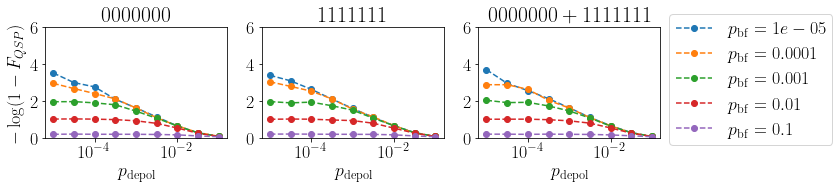

In [53]:
plt.rcParams.update({'font.size': 18,
                     'text.usetex': True})

fid_labels = ['QSP']
plt.figure(figsize=(12,3))
for i,circ in enumerate(circs):
    plt.subplot(1,3,i+1)
    for j,p_readout in enumerate(ps_readout):
        plt.semilogx(ps_depol,neglog_infids[i,j,:,1],f'C{j}o--',label='$p_{\\rm bf} = '+str(p_readout)+'$')
    plt.xlabel('$p_{\\rm depol}$')
    if i==0: plt.ylabel('$-\log(1-F_{QSP})$')
    if i==len(circs)-1: 
        plt.legend(bbox_to_anchor=(1, 1.2))
    plt.ylim([0,6])
    plt.title('$'+circ+'$')
plt.tight_layout()
plt.savefig('plots/nli_fullcircuit_FQSP.png',dpi=200)

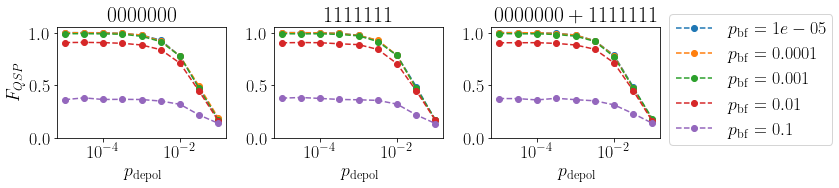

In [55]:
plt.rcParams.update({'font.size': 18,
                     'text.usetex': True})

fid_labels = ['QSP']
plt.figure(figsize=(12,3))
for i,circ in enumerate(circs):
    plt.subplot(1,3,i+1)
    for j,p_readout in enumerate(ps_readout):
        plt.semilogx(ps_depol,fids[i,j,:,1],f'C{j}o--',label='$p_{\\rm bf} = '+str(p_readout)+'$')
    plt.xlabel('$p_{\\rm depol}$')
    if i==0: plt.ylabel('$F_{QSP}$')
    if i==len(circs)-1: 
        plt.legend(bbox_to_anchor=(1, 1.2))
    plt.ylim([0,1.05])
    plt.title('$'+circ+'$')
plt.tight_layout()
plt.savefig('plots/fidelity_fullcircuit_FQSP.png',dpi=200)

In [13]:
np.load(f'data/fullcircuit_fidelities_readout_depol_0000000.npy')[...,1].shape

(5, 9)

/var/folders/kj/jgvpvl2x0pj7x_3xrc02tpt00000gn/T/ipykernel_21209/4912419.py:6: RuntimeWarning: divide by zero encountered in log10
  neglog_infids = -np.log10(1-fids)


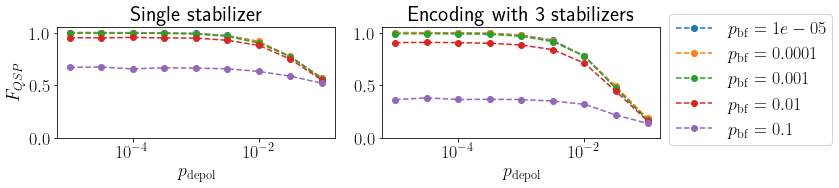

In [25]:
ps_readout= np.logspace(-5,-1,5) 
ps_depol= np.logspace(-5,-1,9)

fids = np.array([np.load(f'data/new_fidelities_readout_depol_0000.npy')[...,-1],
                 np.load(f'data/fullcircuit_fidelities_readout_depol_0000000.npy')[...,1]])
neglog_infids = -np.log10(1-fids)
neglog_infids[neglog_infids == np.inf] = 10

plt.rcParams.update({'font.size': 18,
                     'text.usetex': True})

circs = ['Single stabilizer','Encoding with 3 stabilizers']
plt.figure(figsize=(12,3))
for i,circ in enumerate(circs):
    plt.subplot(1,2,i+1)
    for j,p_readout in enumerate(ps_readout):
        plt.semilogx(ps_depol,fids[i,j,:],f'C{j}o--',label='$p_{\\rm bf} = '+str(p_readout)+'$')
    plt.xlabel('$p_{\\rm depol}$')
    if i==0: plt.ylabel('$F_{QSP}$')
    if i==len(fids)-1: 
        plt.legend(bbox_to_anchor=(1, 1.2))
    plt.ylim([0,1.05])
    plt.title(circ)
plt.tight_layout()
plt.savefig('plots/fidelity_single_encoding_FQSP_0.png',dpi=200)

In [28]:
ps_readout

array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01])

In [29]:
ps_depol

array([1.00000000e-05, 3.16227766e-05, 1.00000000e-04, 3.16227766e-04,
       1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01])

In [31]:
fids[:,3,6]

array([0.87820377, 0.70964311])

In [32]:
fids[:,2,4]

array([0.98673367, 0.96471426])

# LUT Decoder
2.1 Verify 1c and 4a are FT for all 3 plaquettes: the order of qubits doesn't matter

## Verify FT

In [4]:
# stabilizer circuit 1c
num_qubits = [4,1,1]
gate_seq = [[5],(5,4),(2,5),(0,4),(3,5),(1,4),(5,4),[5]]
noise_model,readout_noise = None,None
ZZZZ_1c,_ = create_qsim_circuit(num_qubits,gate_seq,noise_model,readout_noise)
print(ZZZZ_1c)

# verify FT
stab_strings = ['ZZZZ']
fault_types = 'XYZ'
qec_code = ['ZZIZZII','ZIZZIIZ','IIIZZZZ','XXIXXII','XIXXIIX','IIIXXXX']
flags,flag_error_set,flag_error_set_full = get_flag_error_set(num_qubits,stab_strings,fault_types,gate_seq,verbose=1)

flag_error_loc = [0,1,3,4]
FT,_ = check_FT(qec_code,flag_error_set,flags,np.array(flag_error_loc),verbose=2)

                      ┌──┐   ┌──┐
data0: ─────────────────@───────────────────
                        │
data1: ─────────────────┼──────@────────────
                        │      │
data2: ────────────────@┼──────┼────────────
                       ││      │
data3: ────────────────┼┼─────@┼────────────
                       ││     ││
flag0: ───────H───@────X┼─────X┼────@───H───
                  │     │      │    │
syndrome0: ───────X─────X──────X────X───────
                      └──┘   └──┘

> Flag error set <
       IIZZ
       IIIZ
       IIXZ
       IIYZ
       IZII
       XZII
       YZII
       IIII
       IIIX
       IIIY
       IXII
       IYII

Syndromes of flag error set + previous flags:
S 1 2 3 4 5 6 Flags
  -----------
[[0 0 0 0 1 0 1]
 [0 0 0 1 0 1 1]
 [1 1 1 1 0 1 1]
 [1 1 1 0 1 0 1]
 [0 0 0 1 0 0 1]
 [1 1 0 1 0 0 1]
 [1 1 0 0 1 0 1]
 [0 0 0 0 0 0 1]
 [1 0 1 0 0 0 1]
 [1 0 1 1 0 1 1]
 [1 0 0 0 0 0 1]
 [1 0 0 1 0 0 1]]
--> Fault tolerant!


In [275]:
# stabilizer circuit 1c
num_qubits = [4,1,1]
gate_seq = [[5],(5,4),(2,5),(0,4),(3,5),(1,4),(5,4),[5]]
noise_model,readout_noise = None,None
ZZZZ_1c,_ = create_qsim_circuit(num_qubits,gate_seq,noise_model,readout_noise)
print(ZZZZ_1c)

# verify FT
stab_strings = ['ZZZZ']
fault_types = 'XYZ'
qec_code = ['ZZIZZII','ZIZZIIZ','IIIZZZZ','XXIXXII','XIXXIIX','IIIXXXX']
flags,flag_error_set,flag_error_set_full = get_flag_error_set(num_qubits,stab_strings,fault_types,gate_seq,verbose=1)

flag_error_loc = [0,1,3,4]
FT,_ = check_FT(qec_code,flag_error_set,flags,np.array(flag_error_loc),verbose=2)

                      ┌──┐   ┌──┐
data0: ─────────────────@───────────────────
                        │
data1: ─────────────────┼──────@────────────
                        │      │
data2: ────────────────@┼──────┼────────────
                       ││      │
data3: ────────────────┼┼─────@┼────────────
                       ││     ││
flag0: ───────H───@────X┼─────X┼────@───H───
                  │     │      │    │
syndrome0: ───────X─────X──────X────X───────
                      └──┘   └──┘

> Flag error set <
       IIZZ
       IIIZ
       IIXZ
       IIYZ
       IZII
       XZII
       YZII
       IIII
       IIIX
       IIIY
       IXII
       IYII

Syndromes of flag error set + previous flags:
S 1 2 3 4 5 6 Flags
  -----------
[[0 0 0 0 1 0 1]
 [0 0 0 1 0 1 1]
 [1 1 1 1 0 1 1]
 [1 1 1 0 1 0 1]
 [0 0 0 1 0 0 1]
 [1 1 0 1 0 0 1]
 [1 1 0 0 1 0 1]
 [0 0 0 0 0 0 1]
 [1 0 1 0 0 0 1]
 [1 0 1 1 0 1 1]
 [1 0 0 0 0 0 1]
 [1 0 0 1 0 0 1]]
--> Fault tolerant!


In [273]:
# stabilizer circuit 1c
num_qubits = [4,1,1]
gate_seq = [[5],(5,4),(2,5),(0,4),(3,5),(1,4),(5,4),[5]]
noise_model,readout_noise = None,None
ZZZZ_1c,_ = create_qsim_circuit(num_qubits,gate_seq,noise_model,readout_noise)
print(ZZZZ_1c)

# verify FT
stab_strings = ['ZZZZ']
fault_types = 'XYZ'
qec_code = ['ZZIZZII','ZIZZIIZ','IIIZZZZ','XXIXXII','XIXXIIX','IIIXXXX']
flags,flag_error_set,flag_error_set_full = get_flag_error_set(num_qubits,stab_strings,fault_types,gate_seq,verbose=1)

# for comb in itertools.combinations(range(7),4):
for comb in [[0,1,3,4],[0,2,3,6],[3,4,5,6]]:
    print('\nqubits:',np.array(comb)+1)
    for flag_error_loc in itertools.permutations(comb):
        FT,_ = check_FT(qec_code,flag_error_set,flags,np.array(flag_error_loc),verbose=1)

                      ┌──┐   ┌──┐
data0: ─────────────────@───────────────────
                        │
data1: ─────────────────┼──────@────────────
                        │      │
data2: ────────────────@┼──────┼────────────
                       ││      │
data3: ────────────────┼┼─────@┼────────────
                       ││     ││
flag0: ───────H───@────X┼─────X┼────@───H───
                  │     │      │    │
syndrome0: ───────X─────X──────X────X───────
                      └──┘   └──┘

> Flag error set <
       IIZZ
       IIIZ
       IIXZ
       IIYZ
       IZII
       XZII
       YZII
       IIII
       IIIX
       IIIY
       IXII
       IYII

qubits: [1 2 4 5]
--> Fault tolerant!
--> Fault tolerant!
--> Fault tolerant!
--> Fault tolerant!
--> Fault tolerant!
--> Fault tolerant!
--> Fault tolerant!
--> Fault tolerant!
--> Fault tolerant!
--> Fault tolerant!
--> Fault tolerant!
--> Fault tolerant!
--> Fault tolerant!
--> Fault tolerant!
--> Fault tolerant!
--> Fault tolera

In [271]:
# stabilizer circuit 4a
num_qubits = [4,1,1]
gate_seq = [[5],(5,4),(3,5),(0,4),(1,4),(2,4),(5,4),[5]]
noise_model,readout_noise = None,None
ZZZZ_1c,_ = create_qsim_circuit(num_qubits,gate_seq,noise_model,readout_noise)
print(ZZZZ_1c)

# verify FT
stab_strings = ['ZZZZ']
fault_types = 'XYZ'
qec_code = ['ZZIZZII','ZIZZIIZ','IIIZZZZ','XXIXXII','XIXXIIX','IIIXXXX']
flags,flag_error_set,flag_error_set_full = get_flag_error_set(num_qubits,stab_strings,fault_types,gate_seq,verbose=1)

# for comb in itertools.combinations(range(7),4):
for comb in [[0,1,3,4],[0,2,3,6],[3,4,5,6]]:
    print('\nqubits:',np.array(comb)+1)
    for flag_error_loc in itertools.permutations(comb):
        FT,_ = check_FT(qec_code,flag_error_set,flags,np.array(flag_error_loc),verbose=1)

                      ┌──┐
data0: ─────────────────@────────────────────
                        │
data1: ─────────────────┼────@───────────────
                        │    │
data2: ─────────────────┼────┼───@───────────
                        │    │   │
data3: ────────────────@┼────┼───┼───────────
                       ││    │   │
flag0: ───────H───@────X┼────┼───┼───@───H───
                  │     │    │   │   │
syndrome0: ───────X─────X────X───X───X───────
                      └──┘

> Flag error set <
       IIIZ
       IIII
       IIIX
       IIIY
       IZZI
       XZZI
       XIIZ
       IIZI
       IXZI
       IYZI
       IIXI
       IIYI

qubits: [1 2 4 5]
--> Fault tolerant!
--> Fault tolerant!
--> Fault tolerant!
--> Fault tolerant!
--> Fault tolerant!
--> Fault tolerant!
--> Fault tolerant!
--> Fault tolerant!
--> Fault tolerant!
--> Fault tolerant!
--> Fault tolerant!
--> Fault tolerant!
--> Fault tolerant!
--> Fault tolerant!
--> Fault tolerant!
--> Fault tolerant!
-

## Extract syndrome-flag:error strings

In [26]:
num_qubits = [4,1,1]
fault_types = 'XYZ'
qec_code = ['ZZIZZII','ZIZZIIZ','IIIZZZZ','XXIXXII','XIXXIIX','IIIXXXX']
lut = lut_decoder(qec_code)

stab_locs = np.array([[0,3,1,4],[0,3,6,2],[3,6,4,5]]) # Matching order!!
ZZZZ_1c = [[5],(5,4),(2,5),(0,4),(3,5),(1,4),(5,4),[5]]
XXXX_1c = [[4],(4,5),(5,2),(4,0),(5,3),(4,1),(4,5),[4]]
ZZZZ_4a = [[5],(5,4),(3,5),(0,4),(1,4),(2,4),(5,4),[5]]
XXXX_4a = [[4],(4,5),(5,3),(4,0),(4,1),(4,2),(4,5),[4]]
gate_seqs = [ZZZZ_1c,ZZZZ_4a,ZZZZ_1c,XXXX_1c,XXXX_4a,XXXX_1c]
labels = ['Z1','Z2','Z3','X1','X2','X3']


flag_luts = {}
for i,(stab_strings,stab_loc) in enumerate(itertools.product([['ZZZZ'],['XXXX']],stab_locs)):
    flags,flag_error_set,flag_error_set_full = get_flag_error_set(num_qubits,stab_strings,fault_types,gate_seqs[i],verbose=0)
    FT,flag_lut = check_FT(qec_code,flag_error_set,flags,stab_loc,verbose=1)
    flag_luts[labels[i]] = flag_lut

--> Fault tolerant!
--> Fault tolerant!
--> Fault tolerant!
--> Fault tolerant!
--> Fault tolerant!
--> Fault tolerant!


# Assemble the full code

In [37]:
num_qubits = [7,3,3]
bin2dec = 2**np.arange(6)[::-1]
cirq_simulator = cirq.Simulator()
p_depol,p_readout = 1e-3,1e-3

# noise_model,readout_noise = None,None
noise_model = cirq.NoiseModel.from_noise_model_like(cirq.depolarize(p=p_depol))
readout_noise = cirq.BitFlipChannel(p=p_readout)

qubits = init_qubits(num_qubits)

# stab_X1 = create_cirq(qubits,X1245,noise_model,readout_noise,['synd_X1','flag_X1'])
# stab_X2 = create_cirq(qubits,X1347,noise_model,readout_noise,['synd_X2','flag_X2'])
# stab_X3 = create_cirq(qubits,X4567,noise_model,readout_noise,['synd_X3','flag_X3'])

# order: Z1245,Z1347,Z4567 then X
stabilizer_gateseqs = [[[10],(10,7),(0,7),(1,10),(3,7),(4,10),(10,7),[10],['m',7],['m',10]],
                       [[11],(11,8),(2,11),(0,8),(3,8), (6,8),(11,8),[11],['m',8],['m',11]],
                       [[12],(12,9),(3,9),(4,12),(6,9),(5,12),(12,9),[12],['m',9],['m',12]],
                       [[7],(7,10),(7,0),(10,1),(7,3),(10,4),(7,10),[7],['m',7],['m',10]],
                       [[8],(8,11),(11,2),(8,0),(8,3), (8,6),(8,11),[8],['m',8],['m',11]],
                       [[9],(9,12),(9,3),(12,4),(9,6),(12,5),(9,12),[9],['m',9],['m',12]]]

labels = ['Z1','Z2','Z3','X1','X2','X3']
stabilizer_circuits = {l:create_cirq(qubits,
                                     gate_seq,
                                     noise_model,
                                     readout_noise,
                                     [f'synd_{l}',f'flag_{l}']) for gate_seq,l in zip(stabilizer_gateseqs,labels)}

    
steane_code = ['ZZIZZII','ZIZZIIZ','IIIZZZZ','XXIXXII','XIXXIIX','IIIXXXX']

# stab_Z1 = create_cirq(qubits,Z1245,noise_model,readout_noise,['synd_Z1','flag_Z1'])
# stab_Z2 = create_cirq(qubits,Z1347,noise_model,readout_noise,['synd_Z2','flag_Z2'])
# stab_Z3 = create_cirq(qubits,Z4567,noise_model,readout_noise,['synd_Z3','flag_Z3'])
# 
# stabs = [stab_Z1,stab_Z2,stab_Z3,stab_X1,stab_X2,stab_X3]
# qec_code = ['ZZIZZII','ZIZZIIZ','IIIZZZZ','XXIXXII','XIXXIIX','IIIXXXX']
lut = lut_decoder(steane_code)
# print(stab_X1)
# print(stab_X3)

## Encoding
We can choose to
- correct immediately after projecting onto the wrong subspace
- keep track of the syndrome

In [38]:
def encode(stabilizer_circuits,simulator,verbose=0):
    '''
    Encode logical 0 (up to 1-qubit error) using the 3 X-stabilizer circuits
    Input:
        stabilizer_circuits: [Z1,Z2,Z3,X1,X2,X3]
    Output:
        state: dict containing 'state_vector', 'syndrome' and 'syndrome_dec'
    '''
    
    circuit = cirq.Circuit()
    for c in list(stabilizer_circuits.values())[3:]:
        circuit += c
    
    count = 0
    while True:
        count += 1
        state = {}

        results = simulator.simulate(circuit)
        state['statevector'] = results.state_vector()

        X_syndrome,X_flag = [],[]
        for i in range(3):
            X_syndrome.append(results.measurements[f'synd_X{i+1}'])
            X_flag.append(results.measurements[f'flag_X{i+1}'])
        X_syndrome,X_flag = np.array(X_syndrome).flatten(),np.array(X_flag).flatten()
        if X_flag.sum() != 0:
            continue
            # state['syndrome'] = np.hstack([np.zeros(3),X_syndrome]).astype(int)
            # state['syndrome_dec'] = state['syndrome']@bin2dec
            # break
        else:
            state['syndrome'] = np.hstack([np.zeros(3),X_syndrome]).astype(int)
            state['syndrome_dec'] = state['syndrome']@bin2dec
            break
    if verbose: print(f'Encoding with no flag trigged after {count} trial(s)!')
    return state

def encode_correct(state,qubits,num_qubits,simulator,lut):
    '''
    Correct the probabilistic encoding circuit (using stabilizer circuits) to the right subspace based on the measured syndromes
    '''
    if state['syndrome_dec'] == 0:
        # print('No error detected!')
        return state
    circuit = cirq.Circuit(cirq.identity_each(*qubits)) # to trigger saving the state for all qubits
    circuit += cirq.reset_each(*qubits[num_qubits[0]:]) # reset syndromes and flags
    circuit += tab2circ(lut[state['syndrome_dec']],qubits[:num_qubits[0]]) # correction
    results = simulator.simulate(circuit,initial_state=state['statevector'])
    state['statevector'] = results.state_vector()
    state['syndrome'] = np.zeros(6).astype(int)
    state['syndrome_dec'] = 0
    return state

### Ideal

In [182]:
# no correction
num_rep = int(1e3)
diff = []
for i in range(num_rep):
    state = encode(stabilizer_circuits,cirq_simulator)
    diff.append(abs(state['statevector']-logical0_state).sum())
diff = np.array(diff)
print('Encoding success rate:',(diff<1e-6).sum()/num_rep)

Encoding success rate: 0.126


In [183]:
# ignoring triggered flags
# no correction
num_rep = int(1e3)
diff = []
for i in range(num_rep):
    state = encode(stabilizer_circuits,cirq_simulator)
    state = encode_correct(state,qubits,num_qubits,cirq_simulator)
    diff.append(abs(state['statevector']-logical0_state).sum())
diff = np.array(diff)
print('Encoding success rate:',(diff<1e-6).sum()/num_rep)

Encoding success rate: 1.0


### Noisy: 1e-2

In [179]:
# ignoring triggered flags
# no correction
# p_depol,p_readout = 1e-2,1e-2
num_rep = int(1e3)
diff = []
for i in range(num_rep):
    state = encode(stabilizer_circuits,cirq_simulator)
    diff.append(abs(state['statevector']-logical0_state).sum())
diff = np.array(diff)
print('Encoding success rate:',(diff<1e-6).sum()/num_rep)

Encoding success rate: 0.062


In [172]:
# ignoring triggered flags
# p_depol,p_readout = 1e-2,1e-2
num_rep = int(1e3)
diff = []
for i in range(num_rep):
    state = encode(stabilizer_circuits,cirq_simulator)
    state = encode_correct(state,qubits,num_qubits,cirq_simulator)
    diff.append(abs(state['statevector']-logical0_state).sum())
diff = np.array(diff)
print('Encoding success rate:',(diff<1e-6).sum()/num_rep)

Encoding success rate: 0.671


In [176]:
# only consider no flags triggered
# p_depol,p_readout = 1e-2,1e-2
num_rep = int(1e3)
diff = []
for i in range(num_rep):
    state = encode(stabilizer_circuits,cirq_simulator)
    state = encode_correct(state,qubits,num_qubits,cirq_simulator)
    diff.append(abs(state['statevector']-logical0_state).sum())
diff = np.array(diff)
print('Encoding success rate:',(diff<1e-6).sum()/num_rep)

Encoding success rate: 0.767


### Noisy: 1e-3

In [35]:
# only consider no flags triggered
# p_depol,p_readout = 1e-2,1e-2
num_rep = int(1e3)
diff = []
for i in range(num_rep):
    state = encode(stabilizer_circuits,cirq_simulator)
    state = encode_correct(state,qubits,num_qubits,cirq_simulator,lut)
    diff.append(abs(state['statevector']-logical0_state).sum())
diff = np.array(diff)
print('Encoding success rate:',(diff<1e-6).sum()/num_rep)

Encoding success rate: 0.97


## QEC cycle

In [98]:
state['syndrome']

array([0, 0, 0, 0, 0, 0])

6

In [ ]:
bin2dec = 2**np.arange(len(stabilizer_circuits))[::-1]

In [5]:
def qec_cycle(state,stabilizer_circuits,simulator,lut):
    '''
    Sequentially measure each stabilizer
    '''
    print('----------')
    
    current_synd = state['syndrome']
    bin2decs = [2**np.arange(len(stabilizer_circuits)+i)[::-1] for i in range(3)]
    # First round
    synds1 = []
    repeat = False
    for i,label in enumerate(stabilizer_circuits):
        results = simulator.simulate(stabilizer_circuits[label],initial_state=state['statevector'])
        state['statevector'] = results.state_vector()
        synd = results.measurements[f'synd_{label}'].item()
        synds1.append(synd)
        flag = results.measurements[f'flag_{label}']
        if synd != current_synd[i]:
            print('>>> 1st round: Syndrome triggered!')
            repeat = True
            break       
        if flag.sum() != 0:
            print('>>> 1st round: Flags triggered!')
            repeat = True 
            break
            
    if not repeat:
        print('No fault detected!')
    else:
        flag_label = label
        flag1 = flag

        # Second round
        synds2 = []
        flags2 = []
        for label in stabilizer_circuits:
            results = simulator.simulate(stabilizer_circuits[label],initial_state=state['statevector'])
            state['statevector'] = results.state_vector()
            synd = results.measurements[f'synd_{label}'].item()
            flag = results.measurements[f'flag_{label}']
            synds2.append(synd)
            flags2.append(flag)
            if flag.sum() != 0:
                print('>>> 2nd round: Flags triggered!')
        flags2 = np.array(flags2)
        
        # If no flag is triggered in the first round
        # then correct based on syndrome in the second round
        
        if flag1.sum() == 0:
            state['syndrome'] = synds2
            state['syndrome_dec']

        print('flag1:',flag1)
        print('synd1:',synds1)
        print('flag2:',flags2.T)
        print('synd2:',synds2)
        
    return state

## Decode?

In [36]:
state = encode(stabilizer_circuits,cirq_simulator)
print('\n',state)
if state['syndrome_dec'] == 0:
    logical0_state = state['statevector']
state = encode_correct(state,qubits,num_qubits,cirq_simulator,lut)
print(state)
print('\nDifference from logical 0 state: ',abs(state['statevector']-logical0_state).sum())

state = qec_cycle(state,stabilizer_circuits,cirq_simulator,lut)


 {'statevector': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
      dtype=complex64), 'syndrome': array([0, 0, 0, 1, 1, 1]), 'syndrome_dec': 7}
{'statevector': array([ 0.35355327+0.j,  0.        +0.j,  0.        +0.j, ...,
       -0.        +0.j, -0.        +0.j, -0.        +0.j], dtype=complex64), 'syndrome': array([0, 0, 0, 0, 0, 0]), 'syndrome_dec': 0}

Difference from logical 0 state:  2.8284266
----------
>>> 1st round: Syndrome triggered!
flag1: [0]
synd1: [0, 0, 0, 0, 1]
flag2: [[0 0 0 0 0 0]]
synd2: [0, 1, 0, 0, 0, 0]


In [204]:
old_state

{'statevector': array([-0.+0.j,  0.+0.j, -0.+0.j, ...,  0.+0.j,  0.+0.j,  0.+0.j],
       dtype=complex64),
 'syndrome': [1, 0, 0, 0, 1, 0],
 'syndrome_dec': 0}

In [ ]:
def correct(state,qubits,num_qubits,simulator,lut):
    '''
    Correct the probabilistic encoding circuit (using stabilizer circuits) to the right subspace based on the measured syndromes
    '''
    if state['syndrome_dec'] == 0:
        # print('No error detected!')
        return state
    circuit = cirq.Circuit(cirq.identity_each(*qubits)) # to trigger saving the state for all qubits
    circuit += cirq.reset_each(*qubits[num_qubits[0]:]) # reset syndromes and flags
    circuit += tab2circ(lut[state['syndrome_dec']],qubits[:num_qubits[0]]) # correction
    results = simulator.simulate(circuit,initial_state=state['statevector'])
    state['statevector'] = results.state_vector()
    state['syndrome'] = np.zeros(6).astype(int)
    state['syndrome_dec'] = 0
    return state

In [195]:
state = encode_correct(state,qubits,num_qubits,cirq_simulator)
print('\nDifference from logical 0 state: ',abs(state['statevector']-logical0_state).sum())


Difference from logical 0 state:  5.6568537


In [118]:
(np.array([1,0,1])==1) & (np.array([0,1,1])==0)

array([ True, False, False])

In [10]:
lut

{6: array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 4: array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 2: array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 7: array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 5: array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 1: array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]),
 3: array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]),
 48: array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]),
 32: array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]),
 16: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]),
 56: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]),
 40: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]),
 8: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]),
 24: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]),
 54: array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]),
 36: array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]),
 18: array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]),
 63: array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]),


In [9]:
syndromes = np.hstack(list(results.measurements.values()))
tab2circ(lut[syndromes@bin2dec],qubits)

KeyError: 0

In [32]:
tab2str(lut[syndromes@bin2dec])

'IXIIIII'

In [40]:
list(lut.keys())[0]

6

In [33]:
results

measurements: enc_flag_X1=0 enc_flag_X2=0 enc_flag_X3=0 enc_synd_X1=0 enc_synd_X2=0 enc_synd_X3=1
output vector: 0.354|0000000000001⟩ - 0.354|0001111000001⟩ + 0.354|0110101000001⟩ - 0.354|0111010000001⟩ - 0.354|1010110000001⟩ + 0.354|1011001000001⟩ - 0.354|1100011000001⟩ + 0.354|1101100000001⟩

In [9]:
results_1

measurements: enc_flag_X1=0 enc_flag_X2=0 enc_flag_X3=0 enc_synd_X1=0 enc_synd_X2=0 enc_synd_X3=0
output vector: 0.354|0000000000000⟩ + 0.354|0001111000000⟩ - 0.354|0110101000000⟩ - 0.354|0111010000000⟩ - 0.354|1010110000000⟩ - 0.354|1011001000000⟩ + 0.354|1100011000000⟩ + 0.354|1101100000000⟩

In [275]:
results.measurements

{'enc_flag_X1': array([0], dtype=uint8),
 'enc_synd_X1': array([0], dtype=uint8),
 'enc_flag_X2': array([0], dtype=uint8),
 'enc_synd_X2': array([1], dtype=uint8),
 'enc_flag_X3': array([0], dtype=uint8),
 'enc_synd_X3': array([0], dtype=uint8),
 'enc_flag_X4': array([0], dtype=uint8),
 'enc_synd_X4': array([0], dtype=uint8),
 'enc_flag_X5': array([0], dtype=uint8),
 'enc_synd_X5': array([0], dtype=uint8),
 'enc_flag_X6': array([0], dtype=uint8),
 'enc_synd_X6': array([0], dtype=uint8)}

In [244]:
psi = results.state_vector()
abs(state['statevector']-psi).sum()

9.536743e-07

In [210]:
results = cirq_simulator.simulate(encode_circuit,initial_state=state['statevector'])
print(results.state_vector())
results.measurements

[0.35355327+0.j 0.        +0.j 0.        +0.j ... 0.        +0.j
 0.        +0.j 0.        +0.j]


{'enc_flag_X1': array([0], dtype=uint8),
 'enc_synd_X1': array([0], dtype=uint8),
 'enc_flag_X2': array([0], dtype=uint8),
 'enc_synd_X2': array([0], dtype=uint8),
 'enc_flag_X3': array([0], dtype=uint8),
 'enc_synd_X3': array([0], dtype=uint8)}

In [196]:
results.state_vector()

array([0.35355324+0.j, 0.        +0.j, 0.        +0.j, ...,
       0.        +0.j, 0.        +0.j, 0.        +0.j], dtype=complex64)

In [149]:
state['statevector'].sum()

0j

In [59]:
state = {}
state['statevector'] = results.state_vector()

In [55]:
results.measurements

{'enc_flag_X1': array([0], dtype=uint8),
 'enc_synd_X1': array([1], dtype=uint8),
 'enc_flag_X2': array([0], dtype=uint8),
 'enc_synd_X2': array([0], dtype=uint8),
 'enc_flag_X3': array([0], dtype=uint8),
 'enc_synd_X3': array([0], dtype=uint8)}

In [ ]:
def qec_cycle():
    

In [53]:
results = cirq_simulator.run(encode_circuit,repetitions=num_rep)
results.measurements

{'enc_flag_X1': array([[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]], dtype=int8),
 'enc_synd_X1': array([[1],
        [1],
        [0],
        ...,
        [1],
        [0],
        [1]], dtype=int8),
 'enc_flag_X2': array([[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]], dtype=int8),
 'enc_synd_X2': array([[0],
        [1],
        [1],
        ...,
        [0],
        [1],
        [0]], dtype=int8),
 'enc_flag_X3': array([[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]], dtype=int8),
 'enc_synd_X3': array([[1],
        [1],
        [1],
        ...,
        [1],
        [0],
        [1]], dtype=int8)}